In [437]:
import nltk
nltk.download('genesis')
nltk.download('inaugural')
nltk.download('nps_chat')
nltk.download('webtext')
nltk.download('treebank')
nltk.download('stopwords')

from nltk.corpus import udhr
from nltk.book import *
from nltk.corpus import stopwords
from string import punctuation

[nltk_data] Downloading package genesis to
[nltk_data]     /home/tranquochung/nltk_data...
[nltk_data]   Package genesis is already up-to-date!
[nltk_data] Downloading package inaugural to
[nltk_data]     /home/tranquochung/nltk_data...
[nltk_data]   Package inaugural is already up-to-date!
[nltk_data] Downloading package nps_chat to
[nltk_data]     /home/tranquochung/nltk_data...
[nltk_data]   Package nps_chat is already up-to-date!
[nltk_data] Downloading package webtext to
[nltk_data]     /home/tranquochung/nltk_data...
[nltk_data]   Package webtext is already up-to-date!
[nltk_data] Downloading package treebank to
[nltk_data]     /home/tranquochung/nltk_data...
[nltk_data]   Package treebank is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/tranquochung/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [439]:
import  nltk 
import codecs 
import pickle

def getWords(filemname):
    f = open(filemname,'r')
    text = f.read()
#     l = nltk.regexp_tokenize(text, "\w+")
    f.close()
    return text

def getLowerWords(filemname):
    f = open(filemname,'r')
    text = f.read().lower()
#     l = nltk.regexp_tokenize(text, "\w+")
    f.close()
    return text


### On va analyser le corpus 'tbbts03e02.txt' 

In [440]:
filenames = ['tbbt/s3/txt/tbbts03e01.txt',
             'tbbt/s3/txt/tbbts03e02.txt',
             'tbbt/s3/txt/tbbts03e03.txt',
             'tbbt/s3/txt/tbbts03e04.txt',
             'tbbt/s3/txt/tbbts03e05.txt',
             'tbbt/s3/txt/tbbts03e06.txt']

data_raw_text = getWords(filenames[1])

In [441]:
filenames[1]

'tbbt/s3/txt/tbbts03e02.txt'

In [443]:
data_raw_text[:500]

"Sheldon, you're wrong. \nWolverine was not born with bone claws. \nHoward, you know me to be a very smart man. \nDon't you think if I were wrong, I'd know it? \n- First of all - \n- Give it up. \nYou're arguing with a crazy person. \nI'm not crazy. \nMy mother had me tested. \n- Hey, guys. \n- What are you doing here? \nWhat? \nIt's new-comic-book night. \nSince you and Penny hooked up we thought you two would be having bouncy naked yum-yum night. \nThere's more to life than sex, Raj. \nWho had Leonard flames "

#### Le nombre de caractères dans le texte

In [444]:
len(data_raw_text)

13684

## Natural language Processing

## 1. Tokenization

### Découpage en phrases

Afficher le nombre de phases ainsi que les phases correspontdants 

In [446]:

from nltk.tokenize import sent_tokenize, word_tokenize

print("number of sentences in text:",len(sent_tokenize(data_raw_text)))
print("\n")
sentences = sent_tokenize(data_raw_text)
print(sentences[:10])

number of sentences in text: 388


["Sheldon, you're wrong.", 'Wolverine was not born with bone claws.', 'Howard, you know me to be a very smart man.', "Don't you think if I were wrong, I'd know it?", '- First of all - \n- Give it up.', "You're arguing with a crazy person.", "I'm not crazy.", 'My mother had me tested.', '- Hey, guys.', '- What are you doing here?']


### Découpage en mots

In [449]:
print("Number of tokens:",len(word_tokenize(data_raw_text)))
print("\n")
words = word_tokenize(data_raw_text)
print(word_tokenize(data_raw_text)[:500])

Number of tokens: 3109


['Sheldon', ',', 'you', "'re", 'wrong', '.', 'Wolverine', 'was', 'not', 'born', 'with', 'bone', 'claws', '.', 'Howard', ',', 'you', 'know', 'me', 'to', 'be', 'a', 'very', 'smart', 'man', '.', 'Do', "n't", 'you', 'think', 'if', 'I', 'were', 'wrong', ',', 'I', "'d", 'know', 'it', '?', '-', 'First', 'of', 'all', '-', '-', 'Give', 'it', 'up', '.', 'You', "'re", 'arguing', 'with', 'a', 'crazy', 'person', '.', 'I', "'m", 'not', 'crazy', '.', 'My', 'mother', 'had', 'me', 'tested', '.', '-', 'Hey', ',', 'guys', '.', '-', 'What', 'are', 'you', 'doing', 'here', '?', 'What', '?', 'It', "'s", 'new-comic-book', 'night', '.', 'Since', 'you', 'and', 'Penny', 'hooked', 'up', 'we', 'thought', 'you', 'two', 'would', 'be', 'having', 'bouncy', 'naked', 'yum-yum', 'night', '.', 'There', "'s", 'more', 'to', 'life', 'than', 'sex', ',', 'Raj', '.', 'Who', 'had', 'Leonard', 'flames', 'out', 'in', '24', 'hours', '?', 'I', 'did', '.', 'Nothing', 'flamed', 'out', '.', 'We', 'do', "n't", '

In [450]:
formated_en_text = nltk.Text(words)

In [451]:
len(formated_en_text)

3109

### Exporation 


### Objectifs : 
- Determier  qualificatifs principaux attribués au personnage de Sheldon Cooper..
- Determiner combien de caracteres apparaits dans le text. 
- Determiner la relation entre les caracteres.
- Determiner quels animaux sont mentionnés la plus souvent cité dans ce text 

In [464]:

## la méthode vocab permet d'obtenir pour chaque terme présent dans 
##la liste text nltk, le nombre d'occurence des termes

## ici on crée le dictionnaire fdist

def frequency_words(text):
    
    fdist = text.vocab()

    list(fdist.items())

    return sorted(fdist.items(), key=lambda item: item[1], reverse=True)

print(frequency_words(formated_en_text)[:100])


[('.', 290), (',', 128), ('I', 90), ('?', 90), ('you', 78), ('-', 66), ('a', 53), ('the', 53), ('to', 48), ("'s", 45), ("n't", 41), ('it', 38), ('of', 35), ('that', 32), ('and', 31), ('was', 28), ('me', 28), ('is', 28), ('``', 26), ('do', 25), ('What', 24), ('in', 22), ("'re", 20), ('not', 19), ('cricket', 19), ('with', 18), ("'m", 17), ('know', 16), ('be', 16), ('for', 16), ('You', 15), ('we', 14), ('on', 14), ('are', 13), ('Leonard', 13), ('your', 13), ('just', 13), ('my', 13), ('It', 12), ('have', 12), ('Oh', 12), ('can', 12), ('this', 12), ('We', 11), ('what', 11), ('about', 11), ('would', 10), ('Okay', 10), ('right', 10), ('No', 10), ('up', 9), ('an', 9), ('Toby', 9), ('wrong', 8), ('here', 8), ('night', 8), ('Penny', 8), ('sex', 8), ('like', 8), ('fine', 8), ('na', 8), ('That', 8), ('chicken', 8), ('Do', 7), ('had', 7), ('The', 7), ('Let', 7), ('them', 7), ('Sheldon', 6), ('Just', 6), ('down', 6), ('gon', 6), ('from', 6), ('Why', 6), ("'ve", 6), ('really', 6), ('ca', 6), ('name',

Il y a plusieur des conversation, en particulier concernant à les questions (avec les fréquences élevés 90 pour '?')

#### Distribution des fréquences
La distribution des fréquences des mots, pour le texte  qui a été formate.

In [465]:
freqdist = FreqDist(formated_en_text)
freqdist

FreqDist({'.': 290, ',': 128, 'I': 90, '?': 90, 'you': 78, '-': 66, 'a': 53, 'the': 53, 'to': 48, "'s": 45, ...})

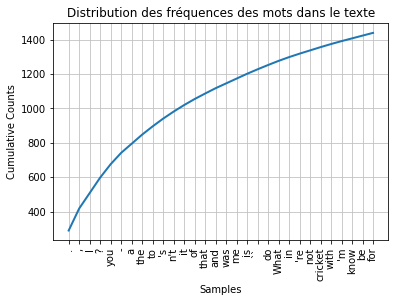

<AxesSubplot:title={'center':'Distribution des fréquences des mots dans le texte'}, xlabel='Samples', ylabel='Cumulative Counts'>

In [466]:
freqdist.plot(30, cumulative=True,
            title="Distribution des fréquences des mots dans le texte")

Parce que le text est écrit sous forme anglais donc que on va afficher un dictionaire qui contient les fréquences (ordonnées par ordre décroissant) de tous mots sauf les stopwords (en version anglais) et la ponctuation 

In [467]:
from nltk.corpus import stopwords
from string import punctuation

non_desired_tokens = stopwords.words("english") + ["[","]","(",")",',','.',"--", '?','*','...','-',"``"]

words_desired = [w for w in word_tokenize(data_raw_text) if w not in non_desired_tokens]

print(words_desired[:100])

['Sheldon', "'re", 'wrong', 'Wolverine', 'born', 'bone', 'claws', 'Howard', 'know', 'smart', 'man', 'Do', "n't", 'think', 'I', 'wrong', 'I', "'d", 'know', 'First', 'Give', 'You', "'re", 'arguing', 'crazy', 'person', 'I', "'m", 'crazy', 'My', 'mother', 'tested', 'Hey', 'guys', 'What', 'What', 'It', "'s", 'new-comic-book', 'night', 'Since', 'Penny', 'hooked', 'thought', 'two', 'would', 'bouncy', 'naked', 'yum-yum', 'night', 'There', "'s", 'life', 'sex', 'Raj', 'Who', 'Leonard', 'flames', '24', 'hours', 'I', 'Nothing', 'flamed', 'We', "n't", 'sex', 'every', 'night', 'You', "n't", "'s", 'highly', 'recommended', 'Take', 'advantage', 'window', 'opportunity', 'slams', 'shut', 'little', 'dinky', 'It', "'s", 'matter', 'opportunity', 'We', "'re", 'getting', 'know', 'There', "'s", 'learning', 'curve', 'What', "'s", 'learn', 'You', 'get', 'naked', 'nasty']


### Découpage en phrases ensuite en mots

C'est-à-dire en redécoupant chaque phrase en mots.

In [468]:
word_sent = [word_tokenize(s) for s in sentences]
print(word_sent[:6])

[['Sheldon', ',', 'you', "'re", 'wrong', '.'], ['Wolverine', 'was', 'not', 'born', 'with', 'bone', 'claws', '.'], ['Howard', ',', 'you', 'know', 'me', 'to', 'be', 'a', 'very', 'smart', 'man', '.'], ['Do', "n't", 'you', 'think', 'if', 'I', 'were', 'wrong', ',', 'I', "'d", 'know', 'it', '?'], ['-', 'First', 'of', 'all', '-', '-', 'Give', 'it', 'up', '.'], ['You', "'re", 'arguing', 'with', 'a', 'crazy', 'person', '.']]


## Part-Of-Speech Tagging (POS Tagging)

Pos tagging pour les phrases en utilisant la fonction nltk.pos_tag_sents sur le object

In [469]:
nltk.download('averaged_perceptron_tagger')
nltk.download('universal_tagset')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/tranquochung/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package universal_tagset to
[nltk_data]     /home/tranquochung/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


True

In [470]:
def POS_words(type , tagset):
    
    words  = []
    
    pos_tag_sents = nltk.pos_tag_sents(word_sent, tagset=tagset)
    for pos_tag_sent in  pos_tag_sents:
        for id in range(0,len(pos_tag_sent)):
            if (pos_tag_sent[id][1] == type):
                words.append(pos_tag_sent[id][0].lower())
    
    return set(words)

In [471]:
###  to find how many personnages qui sont contients dans les text

proper_noun_wds = POS_words('NNP', "")
print(proper_noun_wds)
characters = ['ShelDon', 'Leonard', 'Emile', 'Penny', 'Crawley', 'Howard', 'Cooper']

{'flash', 'sheldon', 'oxnard', 'easy-peasy', 'ironic', 'lambs', 'morse', 'silence', 'palace', 'hallway', 'new', 'emile', 'hmm', 'north', 'schnapps', 'enjoy', 'flashlight', 'hang', 'jiminy', 'ha-ha', 'worlds', 'hey', 'four', 'cooper', 'k.', 'are', 'shiksa', 'okay-dokay', 'howard', 'interesting', 'hello', 'ask', 'voilá.', 'leonard', 'aah', 'told', 'raj', 'guide', 'come', 'silver', 'creepy', 'take', 'holy', 'cruel', 'trust', 'harry', 'kleingast', 'professor', 'fair', 'ooh', 'texas', 'god', 'issue', 'department', 'riley', 'wolverine', 'tandoori', 'dolbear', 'crawley', 'great', 'wii', 'physics', 'old', 'east', 'field', 'fine', 'bornean', 'mumbai', 'delhi', 'wolowitz', 'stairwell', 'peppermint', 'mrs.', 'oecanthus', 'gryllus', 'surfer', 'entomology', 'insects', 'dude', 'dr.', 'young', 'okay', 'ahh', 'penny', 'potter', 'latin', 'ladybugs', 'number', 'toby'}


il y des caractères mentionées dans ce text: 

- ShelDon Cooper

- Creepy Crawley

- Emile Dolbear

- Leonard

- Penny

- Howard


In [472]:
personal_pronoun_wds = POS_words('PRP', "")
print(personal_pronoun_wds)

for v in personal_pronoun_wds :
    for frc_w in frequency_words(formated_en_text):
        if (v == frc_w[0]):
            print(frc_w)

{'us', 'him', 'i', 'we', 'he', 'you', 'them', 'it', "'s", 'me', 'yourself', 'itself', 'they'}
('us', 1)
('him', 2)
('we', 14)
('he', 1)
('you', 78)
('them', 7)
('it', 38)
("'s", 45)
('me', 28)
('yourself', 2)
('itself', 2)
('they', 4)


Afficher le contexte avec le caractère spécifié

In [473]:
for character in characters:
    print(formated_en_text.concordance(character))
    print("\n")

Displaying 6 of 6 matches:
 Sheldon , you 're wrong . Wolverine was not
wer of these embarrassing moments . Sheldon , dinner 's here . Tandoori Palace 
y manipulate you ? Do n't push me , Sheldon . I may be small , but I took kung 
 For example , Jiminy . All right , Sheldon , here we go . Kleingast 's Field G
 forward to having you . Oh , hey , Sheldon . What you got there ? New comic bo
res ? - Oh , hey . - Hey , what did Sheldon say to you ? Not a lot . That we al
None


Displaying 13 of 13 matches:
re to life than sex , Raj . Who had Leonard flames out in 24 hours ? I did . No
 salami . Easy-peasy . Perhaps what Leonard is obliquely referring to is the oc
sexual dysfunction . Okay , who had Leonard gets a floppy disk ? Oh . A clever 
errible . As I was saying , you and Leonard had a disappointing sexual encounte
 encounter . Earlier this evening , Leonard characterized it as , `` Just fine.
em . Whatever , dude . The point is Leonard 's got one and you do n't . Is this
t ? It was i

Grâce au contexte susmentionné, Sheldon Cooper est un scientifique(ou un physicien) (le phase "I 'm Dr. Cooper , from the Physics Department"). 

Leonard et Penny pourraient être en couple car on peut voir le phase que "Leonard and Penny 's sex life"

Howard, Sheldon and Leonard, on peut en déduire que ces personnes peuvent être des amis proches en oberservant leur façon de parler et le nombre d'occurrences de pronoms personnels mots est élevé comme (you,78) ou (we , 11)

Crawley est un professeur d'un école

## Lemmatization

La lemmatisation (ou lemmatisation) en linguistique est le processus de regroupement des formes fléchies d'un mot afin qu'elles puissent être analysées comme un seul élément, identifié par le lemme du mot ou la forme du dictionnaire

Pour exercise, on va voir quels mots principaux utilisés sous forms NOUN, VERB et ADJECTIVE dans le text .

In [477]:
pos_tag_s = nltk.pos_tag_sents(word_sent)
pos_tag_s[:200]

[[('Sheldon', 'NNP'),
  (',', ','),
  ('you', 'PRP'),
  ("'re", 'VBP'),
  ('wrong', 'JJ'),
  ('.', '.')],
 [('Wolverine', 'NNP'),
  ('was', 'VBD'),
  ('not', 'RB'),
  ('born', 'VBN'),
  ('with', 'IN'),
  ('bone', 'NN'),
  ('claws', 'NN'),
  ('.', '.')],
 [('Howard', 'NNP'),
  (',', ','),
  ('you', 'PRP'),
  ('know', 'VBP'),
  ('me', 'PRP'),
  ('to', 'TO'),
  ('be', 'VB'),
  ('a', 'DT'),
  ('very', 'RB'),
  ('smart', 'JJ'),
  ('man', 'NN'),
  ('.', '.')],
 [('Do', 'VBP'),
  ("n't", 'RB'),
  ('you', 'PRP'),
  ('think', 'VB'),
  ('if', 'IN'),
  ('I', 'PRP'),
  ('were', 'VBD'),
  ('wrong', 'JJ'),
  (',', ','),
  ('I', 'PRP'),
  ("'d", 'MD'),
  ('know', 'VB'),
  ('it', 'PRP'),
  ('?', '.')],
 [('-', ':'),
  ('First', 'NN'),
  ('of', 'IN'),
  ('all', 'DT'),
  ('-', ':'),
  ('-', ':'),
  ('Give', 'VB'),
  ('it', 'PRP'),
  ('up', 'RP'),
  ('.', '.')],
 [('You', 'PRP'),
  ("'re", 'VBP'),
  ('arguing', 'VBG'),
  ('with', 'IN'),
  ('a', 'DT'),
  ('crazy', 'JJ'),
  ('person', 'NN'),
  ('.', '.')],

In [478]:
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     /home/tranquochung/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /home/tranquochung/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [479]:
lemmatizer = WordNetLemmatizer()

In [480]:
verbs = POS_words('VERB',"universal")

lem_verb = []
for v in verbs :
    lem_verb.append(lemmatizer.lemmatize(v,'v'))
    
print(set(lem_verb[:200]))

{'refer', 'shut', 'best', 'naked', 'embarrass', "'s", 'forget', 'prey', 'admit', 'look', 'move', 'stick', 'make', 'gon', 'circle', 'polite', 'be', 'fill', 'slog', 'forfeit', 'rib', 'examine', 'figure', 'test', 'settle', 'wear', 'chicken', 'misunderstand', 'determine', 'joke', 'change', 'believe', 'say', 'learn', 'scramble', 'own', 'outsource', 'like', 'seem', 'will', 'base', 'bother', 'disappoint', 'propose', 'should', 'remember', 'go', 'discuss', 'proceed', 'head', 'tell', 'manipulate', 'knock', 'start', "'m", 'find', 'horrify', 'sense', 'recommend', 'grow', 'need', 'agree', 'lessen', 'capture', 'ask', 'wonder', "'ll", 'pack', 'wan', 'have', 'ca', 'name', 'come', 'noogies', 'climb', 'take', 'lose.', 'tree', 'shack', 'hook', 'know', 'show', 'return', 'flame', 'slam', 'fixate', 'din', 'follow', 'catch', 'open', 'put', 'wish', 'want', 'push', 'astonish', 'hit', 'suppose', 'live', 'mean', 'force', 'repulse', 'speak', 'would', 'hold', 'bear', 'buy', 'adjourn', 'upset', 'characterize', 'do'

In [481]:
nouns = POS_words('NOUN',"universal")

lem_noun = []
for n in nouns :
    lem_noun.append(lemmatizer.lemmatize(n,'n'))
    
print(set(lem_noun[:200]))

{'flash', 'resonance', 'front', 'huh', 'lamb', 'relationship', 'food', 'dut', 'advantage', 'elevator', 'ahem', 'easy-peasy', 'play', 'ironic', 'friend', 'world', 'salami', 'movie', 'encounter', 'rain', 'money', 'flow', 'uh-oh', 'ladybug', 'genus', 'machine', 'snowy', 'palace', 'silence', 'congratulation', 'fall', 'hallway', 'new', 'emile', 'safe-deposit', 'fu', 'hmm', 'box', 'bouncy', 'north', 'schnapps', 'book', 'university', 'jean', 'flashlight', 'moment', 'guy', 'net', 'neurotransmitter', 'bitch', 'appearance', 'nerve', 'slur', 'time', 'walk', 'like', 'jiminy', 'room', 'odds', 'ha-ha', 'trivial', 'glass', 'wenteth', 'question', 'wife', 'event', 'cooper', 'home', 'mother', 'battery', 'are', 'pin', 'wager', 'everything', 'shiksa', 'receptor', 'example', 'nothing', 'okay-dokay', 'howard', 'interesting', 'point', 'label', 'insect', 'hello', 'word', 'onion', 'ask', 'voilá.', 'leonard', 'aah', 'school', 'told', 'fella', 'day', 'dut-dut-dut-dut', 'funding', 'life', 'ashamed', 'egg', 'godle

In [482]:
adjs = POS_words('ADJ',"universal")

lem_adj = []

for adj in adjs :
    lem_adj.append(lemmatizer.lemmatize(adj,'a'))
    
print(set(lem_adj[:200]))

{'such', 'dokay', 'much', 'classic', 'floppy', 'present', 'yum-yum', 'naked', 'less', 'contentious', 'insufficient', 'actual', 'gon', 'few', 'many', 'catatonic', 'snowy', 'carnal', 'good', 'careful', 'rhetorical', 'new', 'safe-deposit', 'disappointing', 'biblical', 'precise', 'sorry', 'fantastic', 'afraid', 'world-renowned', 'like', 'willing', 'loose', 'half-hour', 'fourth', 'common', 'shiksi', 'two-bit', 'sweetie', 'ambient', 'uncomfortable', 'embarrassed', 'nasty', 'sexual', 'welcome', 'crazy', 'nonpathetic', 'terrible', 'good-naturedly', 'nothing.', 'other', 'schnapps.', 'bad', 'big', 'gamma-aminobutyric', 'past', 'stupid', 'popular', 'empty', 'new-comic-book', 'inappropriate', 'sure', 'little', 'absurd', 'great', 'mad', 'hot', 'physical', 'upset', 'appropriate', 'old', 'ethyl', 'first', 'learning', 'small', 'fine', 'american', 'wrong', 'peppermint', 'electrical', 'horrible', 'last', 'aware', 'eat', 'indian', 'obsolete', 'boot-cut', 'fifth', 'inexact', 'wine', 'inhibitory', 'young',

### Reconnaissance d’entités nommées

In [483]:
#  Import nltk and download necessary packages
 
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')


[nltk_data] Downloading package punkt to
[nltk_data]     /home/tranquochung/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/tranquochung/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /home/tranquochung/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /home/tranquochung/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

Les entités nommées sont des noms propres qui font référence à des entités spécifiques qui peuvent être une personne, une organisation, un lieu, une date, etc. 



In [484]:
# Tokenise, find parts of speech and chunk words 

categorical_wdrs = {}
i = 0
for sent in nltk.sent_tokenize(sentence):
  for i in range(len(nltk.pos_tag_sents(word_sent))):
      for chunk in nltk.ne_chunk(nltk.pos_tag_sents(word_sent)[i]):
         if hasattr(chunk, 'label'):
            stri = ""
            for c in chunk: 
                stri += c[0] + " "    
            categorical_wdrs.update({stri : chunk.label() })

In [485]:
categorical_wdrs

{'Sheldon ': 'PERSON',
 'Wolverine ': 'PERSON',
 'Howard ': 'PERSON',
 'Hey ': 'PERSON',
 'Raj ': 'GPE',
 'Leonard ': 'PERSON',
 'Nothing ': 'GPE',
 'Take ': 'GPE',
 'Okay ': 'GPE',
 'Harry Potter ': 'PERSON',
 'Ashamed ': 'PERSON',
 'Sex ': 'GPE',
 'Retractable ': 'GPE',
 'Tandoori ': 'PERSON',
 'Palace ': 'ORGANIZATION',
 'Mumbai Palace ': 'PERSON',
 'Dut ': 'GPE',
 'Morse ': 'PERSON',
 'Penny ': 'PERSON',
 'Aah ': 'GPE',
 'Yeah ': 'GPE',
 'Fine ': 'GPE',
 'Good ': 'GPE',
 'Sounds ': 'GPE',
 'Hang ': 'PERSON',
 'Emile Dolbear ': 'PERSON',
 'Humorous ': 'GPE',
 'Latin ': 'PERSON',
 'Dude ': 'GPE',
 'Oecanthus ': 'GPE',
 'Chickens ': 'GPE',
 'Thank God ': 'PERSON',
 'Fair ': 'GPE',
 'Fantastic Four ': 'ORGANIZATION',
 'Silver Surfer ': 'PERSON',
 'Hmm ': 'GPE',
 'Great ': 'GPE',
 'Hallway ': 'GPE',
 'Ahh ': 'GPE',
 'Indian ': 'GPE',
 'Ironic ': 'GPE',
 'Elevator ': 'GPE',
 'Ooh ': 'GPE',
 'Ahem ': 'GPE',
 'Peppermint ': 'GPE',
 'Schnapps ': 'GPE',
 'Stairwell ': 'GSP',
 'Flashlight ': 

- Comme on peut le voir, Wolverine, Harry Potter, Fantastic Four , Silver Surfer, Flash, ces heros sont mentionnes comme PERSON. 

- Entomology Department, American Insects sont des associations lié à l'entomologie.

- Les geolisations lieux sont mentionnées sont Raj, India , New Delhi pour les India, East Texas, Oxnard marqués comme GPE.
  

### Determiner quels animaux sont mentionnés la plus souvent cité dans ce text

In [489]:
from nltk.corpus import wordnet as wn
wn.synsets('animal')

[Synset('animal.n.01'), Synset('animal.s.01')]

In [490]:
# Liste des aliments de la fonctionalité synonyme de WordNet
animal_synset = wn.synset('animal.n.01')
animals = list(set([str.lower(w) for s in animal_synset.closure(lambda s:s.hyponyms())
            for w in s.lemma_names()]))

In [491]:
print(animals[:200])

['constrictor', 'brine_shrimp', 'ceratopsian', 'pagophila_eburnea', 'blackcock', 'three-spined_stickleback', 'black_sheep', 'european_nightjar', 'chauna_torquata', 'cackler', 'olympic_salamander', 'ecrevisse', 'rose_beetle', 'guide_dog', 'bluehead', 'eel', 'thysanopter', 'golden_oriole', 'jackass', 'honey_badger', 'pinnotheres_ostreum', 'northern_whiting', 'pangolin', 'texas_horned_lizard', 'citrophilus_mealybug', 'woolly_plant_louse', 'sea_spider', 'pterosaur', 'greenshank', 'lookdown_fish', 'diodora_apertura', 'coot', 'madagascar_cat', 'bushbuck', 'upland_sandpiper', 'brachyuran', 'turbatrix_aceti', 'phrynosoma_cornutum', 'freetail', 'longhorn', 'flickertail', 'ratite_bird', 'toy_poodle', 'silkworm', 'green_apple_aphid', 'luscinia_megarhynchos', 'new_world_anteater', 'lanius_excubitor', 'stenopterygius', 'sharksucker', 'dusky-footed_woodrat', 'spoonbill_catfish', 'paper_nautilus', 'borer', 'grey_snapper', 'european_curlew', 'imperial_mammoth', 'caddis-fly', 'anisotremus_surinamensis'

In [492]:
animal_in_text = []

lem_list_check_for_animal = lem_noun + lem_adj + lem_verb

for word in lem_list_check_for_animal:
    if word in animals:
        animal_in_text.append(word)

In [493]:
set(animal_in_text)

{'arachnid',
 'bear',
 'beetle',
 'bitch',
 'bug',
 'chicken',
 'cricket',
 'grade',
 'head',
 'horse',
 'insect',
 'ladybug',
 'lamb',
 'male',
 'man',
 'mount',
 'prey',
 'wolverine',
 'world',
 'young'}

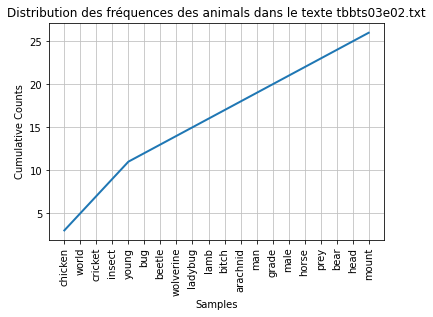

<AxesSubplot:title={'center':'Distribution des fréquences des animals dans le texte tbbts03e02.txt'}, xlabel='Samples', ylabel='Cumulative Counts'>

In [494]:
# «Frequency distribution» pour afficher les fréquences des animals
fd = FreqDist(animal_in_text)
fd.plot(cumulative=True,
       title="Distribution des fréquences des animals dans le texte tbbts03e02.txt")

## Conclusion

Effectivement, J'ai implémenté juste des méthodes pour trouver analyser quelques objectifs, les méthodes ne sont pas optimisée et elles seront mises à jours dans le futur.